In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import random as r 
import seaborn as sn
from math import trunc

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys
consumer_key = "c8iPOfqAcm1qys97q3RW0wKOM"
consumer_secret = "6sUoqS7FtJkIKTfdoWaZHEf5quOEeqAfrJLsSJMzJd2Aw1myoF"
access_token = "229598666-EnGXtgqnFXT8zjHrMTI7medln9PlPdT5thbQhjJh"
access_token_secret = "Bdr3ujJgJqgf6wksE2b8OQ7CxkFTCAi5KolqLZrc9giNH"

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Target User Accounts
target_user = ('@BBC', '@CBS', '@CNN', '@Fox', '@New York times')
#target_user = ('@CNN')

In [5]:
# A list to hold tweet timestamps
tweet_times = []
user_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
time_list = []
    
# Loop through each user
for user in target_user:
    
    # Loop through 10 pages of tweets (total 200 tweets)
    for x in range(25):
        public_tweets = api.user_timeline(user)
        
        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # Add each value to the appropriate array
            user_list.append(user)
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

# Adding all the tweets into an Array

news_data = pd.DataFrame({'Agency': user_list, 'Compound': compound_list,'Positive': positive_list,
                            'Neutral':neutral_list,'Negative':negative_list})


In [6]:
news_data

,Agency,Compound,Negative,Neutral,Positive
0,@BBC,-0.3167,0.178,0.704,0.117
1,@BBC,-0.6908,0.227,0.773,0.000
2,@BBC,0.0000,0.000,1.000,0.000
3,@BBC,0.3612,0.000,0.872,0.128
4,@BBC,0.7545,0.000,0.705,0.295
5,@BBC,-0.6399,0.211,0.725,0.065
6,@BBC,0.9059,0.000,0.533,0.467
7,@BBC,0.0000,0.000,1.000,0.000
8,@BBC,0.5574,0.095,0.655,0.250
9,@BBC,-0.3612,0.128,0.872,0.000


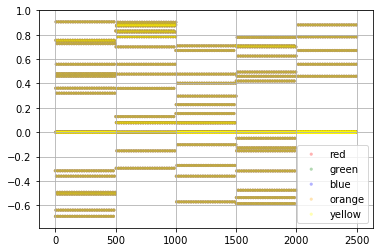

In [8]:
plt.figure(figsize=(12,8))
fig, ax = plt.subplots()
for color in ['red', 'green', 'blue','orange','yellow']:
    
    x = news_data.index
    y = news_data['Compound']
    scale = 10.0 
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

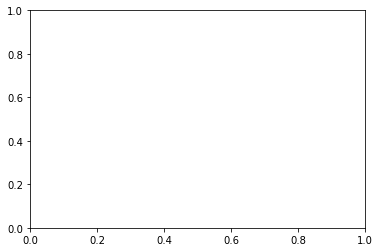

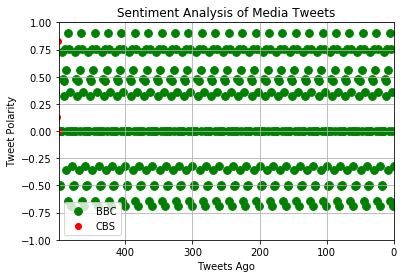

In [10]:
compound = news_data[news_data['Agency'] == '@BBC'].index

ax = plt.subplots()
fig = plt.figure()
#ax.figure(figsize=(12,8))
#ax = plt.scatter(news_data[news_data['Agency'] == '@BBC'].index,news_data[news_data['Agency']=='@BBC']['Compound'], marker ='o', s = 60, color='g', label = 'BBC')
#ax = plt.scatter(news_data[news_data['Agency'] == '@CBS'].index,news_data[news_data['Agency']=='@CBS']['Compound'], marker ='o', color='r', label = 'CBS')
#plt.scatter(news_data[news_data['Agency'] == '@CNN'].index,news_data[news_data['Agency']=='@CNN']['Compound'],  marker ='o', color='y', label = 'CNN')
#plt.scatter(news_data[news_data['Agency'] == '@FOX'], news_data[news_data['Agency']=='@FOX']['Compound'],  marker ='o', color='b', label = 'FOX')
#plt.scatter(news_data[news_data['Agency'] == '@New York Times'], news_data[news_data['Agency']=='@New York Times']['Compound'], marker ='o', color='m', label = 'New York times')

ax1 = fig.add_subplot(111)

ax1.scatter(news_data[news_data['Agency'] == '@BBC'].index,news_data[news_data['Agency']=='@BBC']['Compound'], marker ='o', s = 60, color='g', label = 'BBC')
ax1.scatter(news_data[news_data['Agency'] == '@CBS'].index,news_data[news_data['Agency']=='@CBS']['Compound'], marker ='o', color='r', label = 'CBS')
plt.legend(loc='upper left');

plt.gca().set(xlabel = 'Tweets Ago', ylabel = 'Tweet Polarity',title = 'Sentiment Analysis of Media Tweets',xlim = (max(compound),0), ylim = (-1,1))
plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()


x1 = news_data.plot(kind='scatter', x=compound, y=news_data[news_data['Agency']=='@BBC']['Compound'], color='r')    
ax2 = news_data.plot(kind='scatter', x=compound, y=news_data[news_data['Agency']=='@CBS']['Compound'], color='g', ax=ax1)

In [33]:
# Set style of scatterplot
sn.set_context("notebook", font_scale=1.1)
sn.set_style("ticks")

# Create scatterplot of dataframe
sn.lmplot(compound, # Horizontal axis
           news_data['Compound'], # Vertical axis
           data=news_data, # Data source
           # hue="z") # Set color
           scatter_kws={'marker': "0", # Set marker style
                        "s": 100}) # S marker size

SystemError: <built-in function getattr> returned a result with an error set

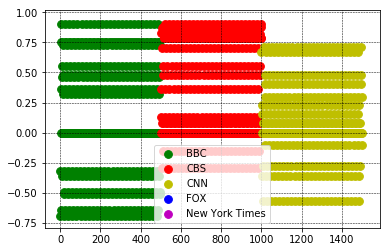

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(news_data[news_data['Agency'] == '@BBC'].index,news_data[news_data['Agency']=='@BBC']['Compound'], s=60, c='g', marker="o", label='BBC')
ax1.scatter(news_data[news_data['Agency'] == '@CBS'].index,news_data[news_data['Agency']=='@CBS']['Compound'], s=60, c='r', marker="o", label='CBS')
ax1.scatter(news_data[news_data['Agency'] == '@CNN'].index,news_data[news_data['Agency']=='@CNN']['Compound'], s=60, c='y', marker="o", label='CNN')

ax1.scatter(news_data[news_data['Agency'] == '@FOX'].index,news_data[news_data['Agency']=='@FOX']['Compound'], s=60, c='b', marker="o", label='FOX')

ax1.scatter(news_data[news_data['Agency'] == '@New York Times'].index,news_data[news_data['Agency']=='@New York Times']['Compound'], s=60, c='m', marker="o", label='New York Times')

plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()


In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(compound,news_data[news_data['Agency']=='@BBC']['Compound'], s=60, c='g', marker="o", label='BBC')
ax1.scatter(compound,news_data[news_data['Agency']=='@CBS']['Compound'], s=60, c='r', marker="o", label='CBS')
ax1.scatter(compound,news_data[news_data['Agency']=='@CNN']['Compound'], s=60, c='y', marker="o", label='CNN')

ax1.scatter(compound,news_data[news_data['Agency']=='@FOX']['Compound'], s=60, c='b', marker="o", label='FOX')

ax1.scatter(compound,news_data[news_data['Agency']=='@New York Times']['Compound'], s=60, c='m', marker="o", label='New York Times')

plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()



ValueError: x and y must be the same size

In [11]:
Compound_percentage =  news_data.groupby('Agency').mean()['Compound'].to_frame("% Compound")
Compound_percentage

,% Compound
Agency,
@BBC,0.11525
@CBS,0.43432
@CNN,0.08894
@Fox,0.09684
@New York times,0.16749


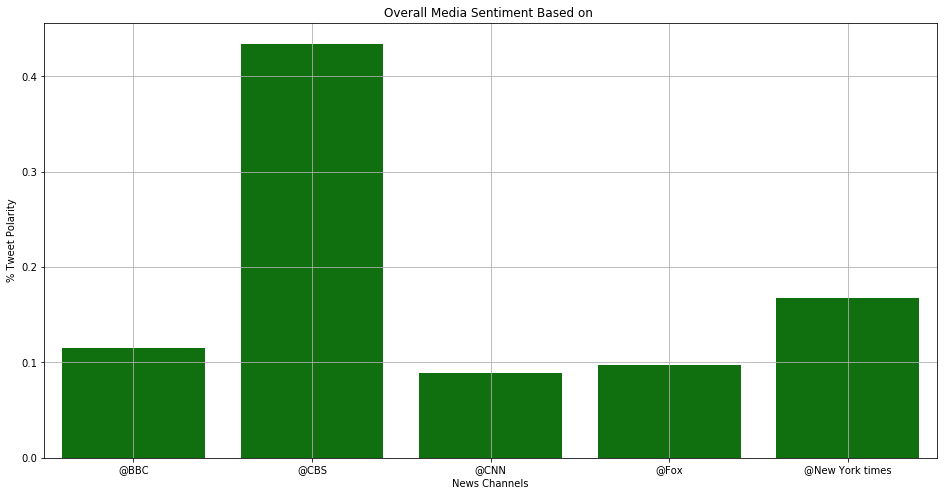

In [12]:
x=Compound_percentage.index
y=Compound_percentage['% Compound']
plt.figure(figsize=(16,8))
colors = ['green' if _y >=0.0 else 'red' for _y in y]
ax = sn.barplot(x, y, palette=colors)

plt.gca().set(xlabel='News Channels', ylabel='% Tweet Polarity', title='Overall Media Sentiment Based on ')
plt.rc('grid', linestyle="--", color='black', linewidth=0.5)
plt.grid(True)
plt.show()

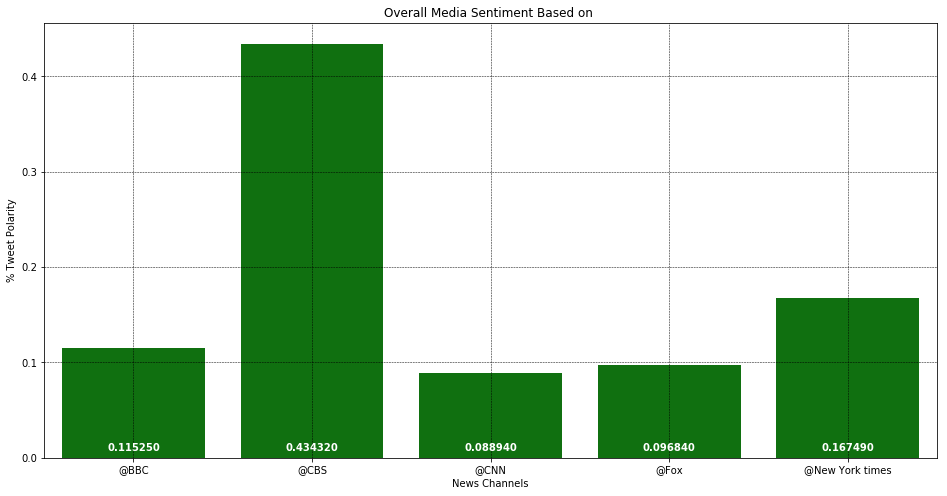

In [13]:
x=Compound_percentage.index
y=Compound_percentage['% Compound']
plt.figure(figsize=(16,8))
colors = ['green' if _y >=0.0 else 'red' for _y in y]
ax = sn.barplot(x, y, palette=colors)
for n, (label, _y) in enumerate(zip(x, y)):
    if _y <= 0.0:
        ax.annotate(
            s='{:f}'.format(_y), xy=(n, -10), ha='center',va='center',
            xytext=(0,10), color='w', textcoords='offset points', weight='bold')
    else:
        ax.annotate(
            s='{:f}'.format(_y), xy=(n, 0), ha='center',va='center',
            xytext=(0,10), color='w', textcoords='offset points', weight='bold')  
plt.gca().set(xlabel='News Channels', ylabel='% Tweet Polarity', title='Overall Media Sentiment Based on ')
plt.rc('grid', linestyle="--", color='black', linewidth=0.5)
plt.grid(True)
plt.show()